Лабораторная работа номер 7. Дифференцирование функций многих переменных. Формула Тейлора

Упражнение 1

In [25]:
# a)

import sympy as sp

x, y = sp.symbols('x y')
z = 'cos(3*x + y**2)'

print('Первая производная по x:')
sp.pprint(sp.diff(z, x))
print('\nПервая производная по y:')
sp.pprint(sp.diff(z, y))
print('\nВторая производная по x:')
sp.pprint(sp.diff(z, x, 2))
print('\nВторая производная по y:')
sp.pprint(sp.diff(z, y, 2))

Первая производная по x:
      ⎛       2⎞
-3⋅sin⎝3⋅x + y ⎠

Первая производная по y:
        ⎛       2⎞
-2⋅y⋅sin⎝3⋅x + y ⎠

Вторая производная по x:
      ⎛       2⎞
-9⋅cos⎝3⋅x + y ⎠

Вторая производная по y:
   ⎛   2    ⎛       2⎞      ⎛       2⎞⎞
-2⋅⎝2⋅y ⋅cos⎝3⋅x + y ⎠ + sin⎝3⋅x + y ⎠⎠


In [26]:
# б)

x, y, z = sp.symbols('x y z')
f = '2*x**3*y + x - z'

dfdx = sp.diff(f, x)
dfdy = sp.diff(f, y)
dfdz = sp.diff(f, z)

print('Градиент: ', [dfdx, dfdy, dfdz])
x0 = dfdx.subs(x, 1)
x0 = x0.subs(y, 2)
y0 = dfdy.subs(x, 1)
print('Градиент в точке (1, 2, -3):', [x0, y0, dfdz])

Градиент:  [6*x**2*y + 1, 2*x**3, -1]
Градиент в точке (1, 2, -3): [13, 2, -1]


Упражнение 2

In [27]:
r, t, z = sp.symbols('r, t, z')

x = r*sp.cos(t)
y = r*sp.sin(t)

A = sp.Matrix([[x, y, z]])
sp.pprint(A)
print()

B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)], [sp.diff(A,z)]])
B = B.T
sp.pprint(B)
print()

sp.pprint(sp.simplify(B.det()))

[r⋅cos(t)  r⋅sin(t)  z]

⎡cos(t)  -r⋅sin(t)  0⎤
⎢                    ⎥
⎢sin(t)  r⋅cos(t)   0⎥
⎢                    ⎥
⎣  0         0      1⎦

r


Упражнение 3

In [28]:
# a)

x, y = sp.symbols('x y')

z = 'x*y**2 + 2*y - x**2'
dzdx = sp.diff(z, x)
dzdy = sp.diff(z, y)

dx = 0.1
dy = -0.2

dz = dzdx * dx + dzdy * dy
sp.pprint(dz)
dz = dz.subs(x, 2)
dz = dz.subs(y, -1)
sp.pprint(round(dz, 3))

                        2      
-0.4⋅x⋅y - 0.2⋅x + 0.1⋅y  - 0.4
0.10


In [29]:
# б)

def diff_func(f, x, y, dx, dy, x0, y0):
    f = eval(f)
    dfdx = sp.diff(f, x)
    dfdy = sp.diff(f, y)
    df = dfdx * dx + dfdy * dy
    df = df.subs(x, x0)
    df = df.subs(y, y0)
    return df

sp.pprint(diff_func('x*y**2 + 2*y - x**2', x, y, 0.1, -0.2, 2, -1))

0.100000000000000


Упражнение 4

In [30]:
x, y = sp.symbols('x y')
z = x*y**2 + 2*y - x**2
d2fdx2 = sp.diff(z, x, 2)
d2fdy2 = sp.diff(z, y, 2)
d2fdxdy = sp.diff(sp.diff(z, x), y)
dz = d2fdx2 * dx**2 + 2 * d2fdxdy * dx * dy + d2fdy2 * dy**2
dz = dz.subs(x, 2)
dz = dz.subs(y, -1)
sp.pprint(round(dz, 3))

0.220


In [31]:
def diff2_func(f, x, y, dx, dy, x0, y0):
    z = eval(f)
    d2fdx2 = sp.diff(z, x, 2)
    d2fdy2 = sp.diff(z, y, 2)
    d2fdxdy = sp.diff(sp.diff(z, x), y)
    dz = d2fdx2 * dx**2 + 2 * d2fdxdy * dx * dy + d2fdy2 * dy**2
    dz = dz.subs(x, x0)
    dz = dz.subs(y, y0)
    return dz
sp.pprint(diff2_func('x*y**2 + 2*y - x**2', x, y, 0.1, -0.2, 2, -1))

0.220000000000000


Упражнение 5

In [32]:
def Taylor_decompose(f, x, y, dx, dy, x0, y0):
    x, y = sp.symbols('x y')
    f_dec = f + sp.diff(f, x)*(x - x0) + sp.diff(f, y)*(y - y0)
    value = f_dec.subs([(x, x0 + dx), (y, y0 + dy)])
    return f_dec, value


f = (2*x**2 + y**2)**2
dx = 0.1
dy = 0.2
x0 = 0.8
y0 = 2.2
gen, value = Taylor_decompose(f, x, y, dx, dy, x0, y0)

sp.pprint(gen)
print()
print(round(value, 3))

                                                                   2
              ⎛   2    2⎞       ⎛   2    2⎞             ⎛   2    2⎞ 
8⋅x⋅(x - 0.8)⋅⎝2⋅x  + y ⎠ + 4⋅y⋅⎝2⋅x  + y ⎠⋅(y - 2.2) + ⎝2⋅x  + y ⎠ 

73.948


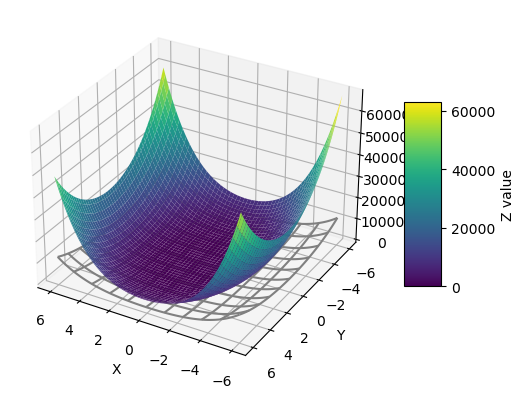

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return (2*x**2 + y**2)**2

def dec_f(x, y):
    return 8*x*(x - 0.8)*(2*x**2 + y**2) + 4*y*(2*x**2 + y**2)*(y - 2.2) + (2*x**2 + y**2)**2

def plot_3d(f, Decf, a, b):
    x_min, x_max = a, b
    y_min, y_max = a, b

    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = f(X, Y)
    ZDec = Decf(X,Y)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    # Отрисовка основной поверхности каркасной
    ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10, color = 'gray')
    
    # Отрисовка касательной плоскости в цвете
    surf = ax.plot_surface(X, Y, ZDec, cmap='viridis', linewidth=0)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Z value')
    
    # Изменяем угол обзора для большей наглядности
    ax.view_init(30, 120)
    
    plt.show()

plot_3d(f, dec_f, -6, 6)

Упражнение 6

In [34]:

def Taylor_decompose2(f, x, y, dx, dy, x0, y0):
    x, y = sp.symbols('x y')
    f_dec = f + sp.diff(f, x)*(x - x0) + sp.diff(f, y)*(y - y0) +  (sp.diff(f, x)*(x - x0)**2 + sp.diff(f, y)*(y - y0)**2)/2
    value = f_dec.subs([(x, x0 + dx), (y, y0 + dy)])
    return f_dec, value


f = (2*x**2 + y**2)**2
dx = 0.1
dy = 0.2
x0 = 0.8
y0 = 2.2
gen, value = Taylor_decompose2(f, x, y, dx, dy, x0, y0)

print(gen)
print()
print(round(value, 3))

4*x*(x - 0.8)**2*(2*x**2 + y**2) + 8*x*(x - 0.8)*(2*x**2 + y**2) + 9.68*y*(2*x**2 + y**2)*(0.454545454545455*y - 1)**2 + 4*y*(2*x**2 + y**2)*(y - 2.2) + (2*x**2 + y**2)**2

75.630


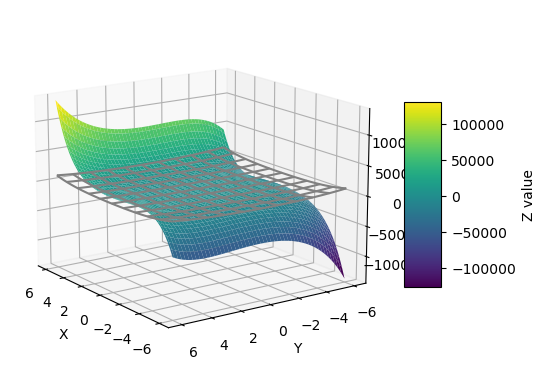

In [35]:
def f(x, y):
    return (2*x**2 + y**2)**2
def dec_f(x, y):
    return 4*x*(x - 0.8)**2*(2*x**2 + y**2) + 8*x*(x - 0.8)*(2*x**2 + y**2) + 9.68*y*(2*x**2 + y**2)*(0.454545454545455*y - 1)**2 + 4*y*(2*x**2 + y**2)*(y - 2.2) + (2*x**2 + y**2)**2

def plot_3d(f, Decf, a, b):
    x_min, x_max = a, b
    y_min, y_max = a, b

    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = f(X, Y)
    ZDec = Decf(X,Y)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    # Отрисовка основной поверхности каркасной
    ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10, color = 'gray')
    
    # Отрисовка касательной плоскости в цвете
    surf = ax.plot_surface(X, Y, ZDec, cmap='viridis', linewidth=0)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Z value')
    
    # Изменяем угол обзора для большей наглядности
    ax.view_init(15, 145)
    
    plt.show()

plot_3d(f, dec_f, -6, 6)

Упражнение 1С

In [36]:
r, t, O, z = sp.symbols('r t O z')

x = r * sp.cos(O) * sp.cos(t)
y = r * sp.cos(O) * sp.sin(t)
z = r * sp.sin(O)

A = sp.Matrix([[x, y, z]])

B = sp.Matrix([[sp.diff(A,r)], [sp.diff(A,t)], [sp.diff(A,O)]])
sp.pprint(B.T)

print()
# вычисление якобиана
sp.pprint(sp.simplify(B.det())) # упрощение выражения с помощью simplify

⎡cos(O)⋅cos(t)  -r⋅sin(t)⋅cos(O)  -r⋅sin(O)⋅cos(t)⎤
⎢                                                 ⎥
⎢sin(t)⋅cos(O)  r⋅cos(O)⋅cos(t)   -r⋅sin(O)⋅sin(t)⎥
⎢                                                 ⎥
⎣   sin(O)             0              r⋅cos(O)    ⎦

 2       
r ⋅cos(O)


Упражнение 2С

In [41]:
def taylor_exp(f, var, p, inc):
    
    x = sp.symbols(' '.join(var))
    p_dict = {var: val for var, val in zip(var, p)}
    inc_dict = {var: val for var, val in zip(var, inc)}
    
    f_sym = f.subs(p_dict)
    tay_s = f_sym
    tay_s_text= str(f_sym) + " + "
    counter = 0
    counter1 = 0
    counter2 = 0
    
    for i in var :

        tay_s += sp.diff(f,i,1) * inc[counter]
        if str(sp.diff(f,i,1))!='' or str(sp.diff(f,i,1))!='0':
            tay_s_text+= '('+str(sp.diff(f,i,1))+') * ('+str(i)+'-'+ str(p[counter]) + ') + '
        else :
            tay_s_text += ''
        
        counter += 1;

    for i in var :
        c = sp.diff(f,i,1)

        for j in var :
            tay_s += sp.diff(c,j,1)/2*inc[counter2]*inc[counter1]
            if str(sp.diff(c,j,1))!='' or str(sp.diff(c,j,1))!='0':
                tay_s_text += '('+str(sp.diff(c,j,1)/2)+') * ('+str(i)+'-'+ str(p[counter1]) + ')*(' + str(j)+'-'+ str(p[counter2]) + ') + '
            else :
                tay_s_text +=' '
            counter2 += 1;
        counter1 += 1
        counter2 = 0
    tay_s_text = tay_s_text [0:-2]          

    tay_s = tay_s.subs(p_dict)
    approx_value = f.subs({var: val + inc_dict[var] for var, val in p_dict.items()})

    print("Функция, разложенная по формуле Тейлора: ")
    print(tay_s_text)
    print("\nПриближенное значение функции:")
    print(round(tay_s, 4))
    print("\nТочное значение функции:")
    print(round(approx_value, 4))
    return tay_s, approx_value

x, y = sp.symbols('x y')
f = (2*x**2 + y**2)**2
var = ['x', 'y']
p = [0.8, 2.2]
inc = [0.1, 0.2]

tay_s, approx_value = taylor_exp(f, var, p, inc)

Функция, разложенная по формуле Тейлора: 
37.4544000000000 + (8*x*(2*x**2 + y**2)) * (x-0.8) + (4*y*(2*x**2 + y**2)) * (y-2.2) + (24*x**2 + 4*y**2) * (x-0.8)*(x-0.8) + (8*x*y) * (x-0.8)*(y-2.2) + (8*x*y) * (y-2.2)*(x-0.8) + (4*x**2 + 6*y**2) * (y-2.2)*(y-2.2) 

Приближенное значение функции:
54.3168

Точное значение функции:
54.4644
